In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read data
df = pd.read_excel('default of credit card clients.xls', index_col = 0, header = 1)

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
#combining values for certain education numbers 
df.loc[df['EDUCATION'] == 0, 'EDUCATION'] = 4
df.loc[df['EDUCATION'] == 5, 'EDUCATION'] = 4
df.loc[df['EDUCATION'] == 6, 'EDUCATION'] = 4

In [ ]:
# Onehot encoding using pandas get_dummies. 
onehot_columns = ['SEX','EDUCATION','MARRIAGE']
df = pd.get_dummies(df, columns = onehot_columns)

In [ ]:
#bill Amounts are highly correlated
df.drop(['BILL_AMT2'], axis = 1, inplace = True)
df.drop(['BILL_AMT3'], axis = 1, inplace = True)
df.drop(['BILL_AMT4'], axis = 1, inplace = True)
df.drop(['BILL_AMT5'], axis = 1, inplace = True)
df.drop(['BILL_AMT6'], axis = 1, inplace = True)

In [ ]:
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,...,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,-1,-1,-2,-2,3913,0,...,0,1,0,1,0,0,0,1,0,0
2,120000,26,-1,2,0,0,0,2,2682,0,...,0,1,0,1,0,0,0,0,1,0
3,90000,34,0,0,0,0,0,0,29239,1518,...,0,1,0,1,0,0,0,0,1,0
4,50000,37,0,0,0,0,0,0,46990,2000,...,0,1,0,1,0,0,0,1,0,0
5,50000,57,-1,0,-1,0,0,0,8617,2000,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'default payment next month', 'SEX_1', 'SEX_2',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [ ]:
# prepare to train
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# set train and target
y = df['default payment next month']
X = df.drop(['default payment next month'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# apply MinMaxScaler on train data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
# set up kmeans
kmeans = KMeans(n_clusters=2, random_state=20)

In [ ]:
# kmeans train
kmeans.fit(X_train_scale)

KMeans(n_clusters=2, random_state=20)

In [ ]:
# kmeans predictions
y_pred = kmeans.predict(X_test_scale)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, accuracy_score

f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f1)
print(prec)
print(recall)
print(accuracy)

0.29427312775330394
0.20700340873876666
0.5087585681645087
0.466


Text(0.5, 1.0, 'Confusion Matrix of KMeans Clustering')

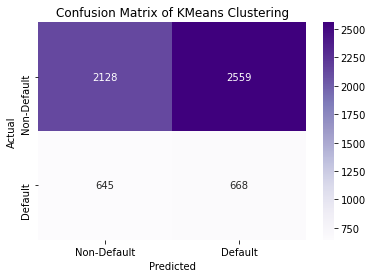

In [ ]:
#generating confusion matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Purples",
xticklabels = ['Non-Default', 'Default'],
yticklabels = ['Non-Default', 'Default'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix of KMeans Clustering")

In [ ]:
# classification report for KMeans
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.45      0.57      4687
           1       0.21      0.51      0.29      1313

    accuracy                           0.47      6000
   macro avg       0.49      0.48      0.43      6000
weighted avg       0.64      0.47      0.51      6000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scale, y_train)
knn_pred = knn.predict(X_test_scale)

In [ ]:
kf1 = f1_score(y_test,knn_pred)
kprec = precision_score(y_test,knn_pred)
krecall = recall_score(y_test,knn_pred)
kacc = accuracy_score(y_test, knn_pred)

print(kf1)
print(kprec)
print(krecall)
print(kacc)

0.43299869052815365
0.5071574642126789
0.37776085300837775
0.7835


Text(0.5, 1.0, 'Confusion Matrix of KNN (n=3)')

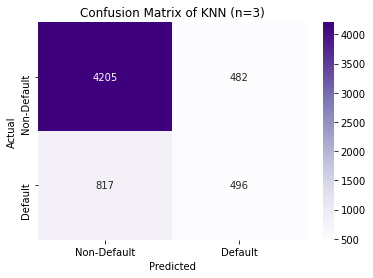

In [ ]:
conf_mat = confusion_matrix(y_test, knn_pred)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Purples",
xticklabels = ['Non-Default', 'Default'],
yticklabels = ['Non-Default', 'Default'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix of KNN (n=3)")

In [ ]:
# classification report for KNN
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4687
           1       0.51      0.38      0.43      1313

    accuracy                           0.78      6000
   macro avg       0.67      0.64      0.65      6000
weighted avg       0.77      0.78      0.77      6000



In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors': [3,5,7,9,11,19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 5,
)

gs_result = gs.fit(X_train_scale, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
gs_result.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}

In [ ]:
new_knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 19, weights= 'uniform')
new_knn.fit(X_train_scale, y_train)
new_pred = new_knn.predict(X_test_scale)

In [ ]:
nf1 = f1_score(y_test,new_pred)
nprec = precision_score(y_test,new_pred)
nrecall = recall_score(y_test,new_pred)
nacc = accuracy_score(y_test, new_pred)

print(nf1)
print(nprec)
print(nrecall)
print(nacc)

0.42056555269922885
0.6471518987341772
0.3115003808073115
0.8121666666666667


Text(0.5, 1.0, 'Confusion Matrix of tuned KNN')

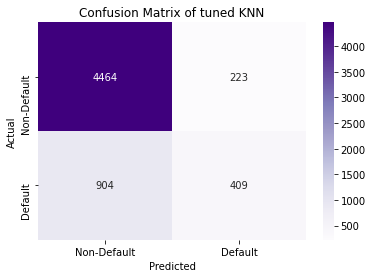

In [ ]:
conf_mat = confusion_matrix(y_test, new_pred)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Purples",
xticklabels = ['Non-Default', 'Default'],
yticklabels = ['Non-Default', 'Default'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix of tuned KNN")

In [ ]:
# classification report for tuned KNN
print(classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4687
           1       0.65      0.31      0.42      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.63      0.65      6000
weighted avg       0.79      0.81      0.79      6000



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2ef959e-644b-49ba-838b-a88868d44d86' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>